# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict weather the parkinglot is occupied or empty. You are provided with a dataset of parkinglot images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation)
### **Dataset Name:** ParkingLot Occupation

### **Description:**  
The dataset contains images of labeld parkinglot images for classification purposes. Each image belongs to one of the 2 classes, representing the label.

### **Labels:**
* `empty`
* `occupied`


## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation).

In [133]:
# !kaggle datasets download -d khaledzsa/parkinglot-occupation
# !unzip parkinglot-occupation.zip

## Import Libraries

In [134]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout,Rescaling
import numpy as np
import matplotlib.pyplot as plt

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [135]:
train_path = '/content/ParkingLot_Occupation/train'
test_path = '/content/ParkingLot_Occupation/test'

## Data Splitting
In this section, we will split our dataset into three parts:

* `train` Folder: Training set (85%).
* `train` Folder: Validation set (15%).
* `test` Folder: Test set (100%).

In [136]:
# Train dataset
train =image_dataset_from_directory(
    train_path,
    image_size=(64, 64),
    color_mode='rgb',
    subset ='training',
    validation_split=0.15,
    shuffle=True,
    seed=0

)
# Validate dataset
validate =image_dataset_from_directory(
    train_path,
    image_size=(64, 64),
    color_mode='rgb',
    validation_split=0.15,
    subset='validation',
    shuffle=True,
    seed=0

)
# Test dataset
test = image_dataset_from_directory(
    test_path,
    image_size=(64,64)
)

Found 1382 files belonging to 2 classes.
Using 1175 files for training.
Found 1382 files belonging to 2 classes.
Using 207 files for validation.
Found 344 files belonging to 2 classes.


## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

Conv2D, Flatten, MaxPooling2D

In [137]:
model= Sequential()

model.add(Conv2D(32, (3,3), activation='relu',input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# add new hidden layer for testing
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [138]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [139]:
history=model.fit(train, epochs=20, validation_data=validate)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 234ms/step - accuracy: 0.6528 - loss: 46.1973 - val_accuracy: 0.9807 - val_loss: 0.0487
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 248ms/step - accuracy: 0.9119 - loss: 0.4008 - val_accuracy: 0.9903 - val_loss: 0.0379
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 261ms/step - accuracy: 0.9836 - loss: 0.0766 - val_accuracy: 0.9758 - val_loss: 0.0652
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 238ms/step - accuracy: 0.9806 - loss: 0.0508 - val_accuracy: 0.9903 - val_loss: 0.0427
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 219ms/step - accuracy: 0.9923 - loss: 0.0377 - val_accuracy: 0.9758 - val_loss: 0.0573
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step - accuracy: 0.9866 - loss: 0.0668 - val_accuracy: 0.9903 - val_loss: 0.0771
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 254ms/step - accuracy: 0.9910 - loss: 0.0757 - val_accuracy: 0.9903 - val_loss: 0.0372
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 263ms/step - accuracy: 0.9844 - loss: 0.0669 - val_accur

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [140]:
model.evaluate(test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 1.0000 - loss: 0.0044


[0.004857632331550121, 1.0]

## Make Predictions
Use the trained model to make predictions on new or unseen parkinglot images.

if you need new, we prepared some data for you [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

If you ran the command above, you should have a file called ParkingLot_Occupation in your current directory. which contains the testing dataset.
If you ran the command above <span style='color:red;'>DON'T RUN THIS CELL</span>

In [141]:
# !kaggle datasets download -d khaledzsa/parkinglot-occupation
# !unzip parkinglot-occupation.zip

In [160]:
# y_pred = model.predict(test)

In [161]:
# y_pred < 0.5

In [162]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return 'occupied' if prediction[0] > 0.5 else 'empty'

img_path = '/content/ParkingLot_Occupation/test/empty/roi_023ee6f9ea20407da126475ef5bfe567_empty.jpg'
print(predict_image(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
empty


In [163]:
img_path = '/content/ParkingLot_Occupation/test/occupied/roi_08c5b8efc7c84e7393c50ff3125e428a_occupied.jpg'
print(predict_image(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
occupied


## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

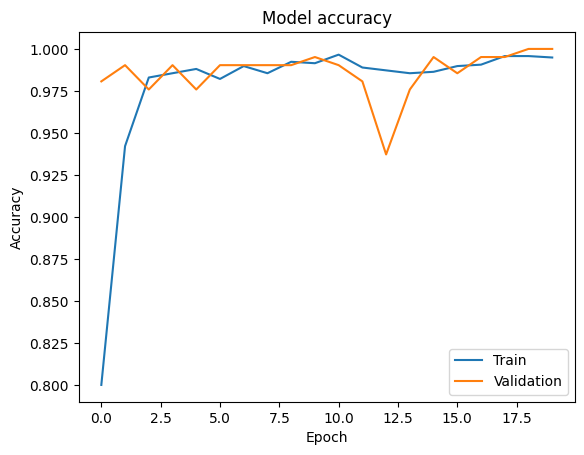

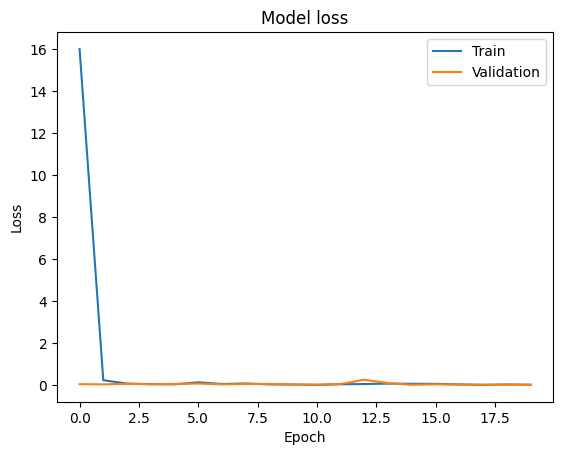

In [164]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


## Save the Model
Save the trained CNN model for submission.

In [146]:
model.save('model_task2.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?


### Answer Here:

1. Data Preprocessing:
* Resizing Images: I resized the images to 128x128 pixels to ensure a consistent input size for the CNN.
* Normalization: I normalized the pixel values to the range [0, 1] by dividing by 255. Normalization helps stabilize the training process.

2. Model Architecture:
* Convolutional Layers: The model architecture consists of three convolutional layers with 32, 64, and 128 filters, respectively. Each convolutional layer is followed by a max-pooling layer. This structure allows the model to learn complex features from the input images.

* Flatten and Dense Layers: After the Conv2D layers, a Flatten layer is used to convert the 2D feature maps into a 1D vector.
* last layer contain a dense layer with 512 neurons, which helps for combinations of the extracted features.

* Dropout: A dropout layer with a rate of 0.2 is used to prevent overfitting


3. Training Process:
* Batch Size (32): I chose a batch size of 32, which provides a good balance.
* Number of Epochs (20): I trained the model for 20 epochs.
* Optimizer (Adam): The Adam optimizer was selected for its adaptive learning rate.

4. Loss Function and Metrics:
* Loss: I used binary crossentropy as the loss function since this is a binary classification task.
* Accuracy: Accuracy was chosen as the evaluation metric because it directly measures the proportion of correctly classified images.

5. Regularization Techniques:
* Dropout: I implemented dropout as a regularization technique to reduce overfitting.

6. Model Evaluation:
* Test Set Evaluation: after training the model this was the model evaluate on the test dataset : accuracy: 0.9925 - loss: 0.0205.


7. Model Visualization:
* Accuracy and Loss Curves: The accuracy and loss curves was plotted during training. A good improvement in accuracy and a decrease in loss.

